In [106]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()

In [107]:
'''
The data I will use is on the classification of poker hands from here
http://archive.ics.uci.edu/ml/datasets/Poker+Hand
'''
import urllib.request
import matplotlib.pyplot as plt
import numpy as np

req = urllib.request.Request('http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data')
response = urllib.request.urlopen(req)
the_page = response.read().decode()

Pok = the_page


In [108]:
'''
Here we convert the data set from a string into an array
'''
NewPok = Pok.split('\n')
print([s.strip('\r') for s in NewPok]) # remove the \r from the string borders
print([s.replace('\r', '') for s in NewPok]) # remove all the \rs

for i in range(len(NewPok)):
    NewPok[i] = np.fromstring(NewPok[i], dtype = int,sep = ',')

['1,10,1,11,1,13,1,12,1,1,9', '2,11,2,13,2,10,2,12,2,1,9', '3,12,3,11,3,13,3,10,3,1,9', '4,10,4,11,4,1,4,13,4,12,9', '4,1,4,13,4,12,4,11,4,10,9', '1,2,1,4,1,5,1,3,1,6,8', '1,9,1,12,1,10,1,11,1,13,8', '2,1,2,2,2,3,2,4,2,5,8', '3,5,3,6,3,9,3,7,3,8,8', '4,1,4,4,4,2,4,3,4,5,8', '1,1,2,1,3,9,1,5,2,3,1', '2,6,2,1,4,13,2,4,4,9,0', '1,10,4,6,1,2,1,1,3,8,0', '2,13,2,1,4,4,1,5,2,11,0', '3,8,4,12,3,9,4,2,3,2,1', '1,3,4,7,1,5,2,4,4,13,0', '1,4,1,1,1,3,3,5,3,2,4', '3,8,3,12,2,7,2,6,1,2,0', '4,8,1,11,4,6,3,2,4,12,0', '3,7,2,7,4,11,1,12,3,1,1', '1,13,4,8,2,7,2,10,3,13,1', '2,6,2,8,1,11,1,4,3,7,0', '3,10,2,10,4,5,1,2,3,8,1', '2,1,3,13,4,6,1,9,4,1,1', '2,10,2,8,1,8,3,2,2,13,1', '2,13,1,5,4,5,4,8,3,3,1', '3,1,1,5,2,7,3,13,1,1,1', '1,7,1,5,4,8,1,6,2,6,1', '3,7,3,9,2,12,2,5,4,4,0', '2,10,1,1,1,12,4,6,2,8,0', '3,13,2,7,4,11,3,11,2,11,3', '4,2,2,7,3,13,2,11,3,10,0', '1,11,2,7,1,6,4,2,1,1,0', '3,4,4,3,3,5,2,12,1,9,0', '3,2,1,6,2,11,4,3,2,10,0', '4,8,4,3,4,13,4,12,1,1,0', '2,6,4,8,4,3,2,2,1,2,1', '4,13,1,6,3,

In [109]:
NewPok
len(NewPok)

25011

In [115]:
X = []
Y = []
for i in range(len(NewPok)-1):
    X.append(NewPok[i][:10])
    element = NewPok[i][10]
    Y.append(element)

In [124]:
X

[array([ 1, 10,  1, 11,  1, 13,  1, 12,  1,  1]),
 array([ 2, 11,  2, 13,  2, 10,  2, 12,  2,  1]),
 array([ 3, 12,  3, 11,  3, 13,  3, 10,  3,  1]),
 array([ 4, 10,  4, 11,  4,  1,  4, 13,  4, 12]),
 array([ 4,  1,  4, 13,  4, 12,  4, 11,  4, 10]),
 array([1, 2, 1, 4, 1, 5, 1, 3, 1, 6]),
 array([ 1,  9,  1, 12,  1, 10,  1, 11,  1, 13]),
 array([2, 1, 2, 2, 2, 3, 2, 4, 2, 5]),
 array([3, 5, 3, 6, 3, 9, 3, 7, 3, 8]),
 array([4, 1, 4, 4, 4, 2, 4, 3, 4, 5]),
 array([1, 1, 2, 1, 3, 9, 1, 5, 2, 3]),
 array([ 2,  6,  2,  1,  4, 13,  2,  4,  4,  9]),
 array([ 1, 10,  4,  6,  1,  2,  1,  1,  3,  8]),
 array([ 2, 13,  2,  1,  4,  4,  1,  5,  2, 11]),
 array([ 3,  8,  4, 12,  3,  9,  4,  2,  3,  2]),
 array([ 1,  3,  4,  7,  1,  5,  2,  4,  4, 13]),
 array([1, 4, 1, 1, 1, 3, 3, 5, 3, 2]),
 array([ 3,  8,  3, 12,  2,  7,  2,  6,  1,  2]),
 array([ 4,  8,  1, 11,  4,  6,  3,  2,  4, 12]),
 array([ 3,  7,  2,  7,  4, 11,  1, 12,  3,  1]),
 array([ 1, 13,  4,  8,  2,  7,  2, 10,  3, 13]),
 array([ 2

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [122]:
estimator.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [123]:
y_predicted = estimator.predict(X_test)

#test the accuracy
accuracy = np.mean(y_test == y_predicted) *100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 55.3%


The accuracy is not very good. I think there are too many variables to deal with.

In [125]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator, X, Y, scoring = 'accuracy')
average_accuracy = np.mean(scores)*100
print("The accuracy is {0:.1f}%".format(average_accuracy))

C:\Users\KCast_000\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


The accuracy is 54.4%


The accuracy is still not very good.

In [126]:
import warnings
warnings.filterwarnings('ignore')

avg_scores = []
all_scores = []
parameters = list(range(1,20))
for n_neighbors in parameters:
    estimator = KNeighborsClassifier()
    scores = cross_val_score(estimator, X, Y, scoring = 'accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

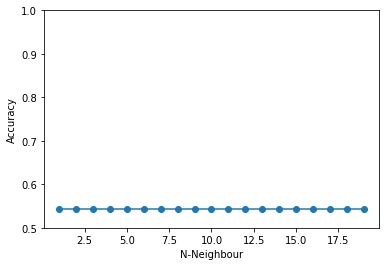

In [128]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(parameters, avg_scores, '-o')
plt.xlabel('N-Neighbour')
plt.ylabel('Accuracy')
plt.ylim([0.5,1.0])

plt.show()